# Question 2

# Importing and Preprocessing

In [1]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
%matplotlib inline

import pycountry
import nltk.sentiment.vader

import preprocess

/home/louisfaucon/anaconda3/lib/python3.5/site-packages/nltk/twitter/__init__.py:20: UserWarning: The twython library has not been installed. Some functionality from the twitter package will not be available.
  warnings.warn("The twython library has not been installed. "


In [2]:
filename = './hillary-clinton-emails/Emails.csv'
df_emails = pd.read_csv(filename)
df_emails['ProcessedText'] = df_emails.apply(lambda row: preprocess.processText(row.RawText), axis=1)

# Sentiment Analysis

For each email we first extract the list of countries mentionned in this email, then compute the sentiment score of the email using the vader library

In [3]:
analyzer = nltk.sentiment.vader.SentimentIntensityAnalyzer('vader_lexicon.txt')

def getSentimentsCountries(row):
    countries = [country.name for country in list(pycountry.countries) if country.name.lower() in row.ProcessedText ]
    row['Countries'] = countries
    row['Score'] = analyzer.polarity_scores(' '.join(row.ProcessedText))['compound'] if countries else 0.
    return row

df_emails = df_emails.apply(getSentimentsCountries, axis=1)
df_emails[['ProcessedText','Countries','Score']].head()

,ProcessedText,Countries,Score
0,"[wonderful, strong, moving, statement, bos, pl...",[],0.0000
1,"[thursday, march, latest, syria, aiding, qadda...","[Egypt, Spain, France, Israel, Lebanon, Libya,...",0.9873
2,"[thx, original, message, former, colleague, te...",[],0.0000
3,"[mill, cheryl, subject, cairo, condemnation, f...",[Egypt],-0.7269
4,"[hrod17, clintonemail, com, friday, march, hum...","[Egypt, Spain, France, Israel, Lebanon, Libya,...",0.9873


In [4]:
# get the list of all countries
allCountries = []
for countries in df_emails.Countries.values:
    for country in countries:
        if country not in allCountries:
            allCountries.append(country)

In [5]:
# Extract the list of score and number of time each country is mentionned 
scores = []
frequencies = []
for country in allCountries:
    score = df_emails[[country in countries for countries in df_emails.Countries.values]].Score.values
    frequencies.append(len(score))
    scores.append(np.mean(score))

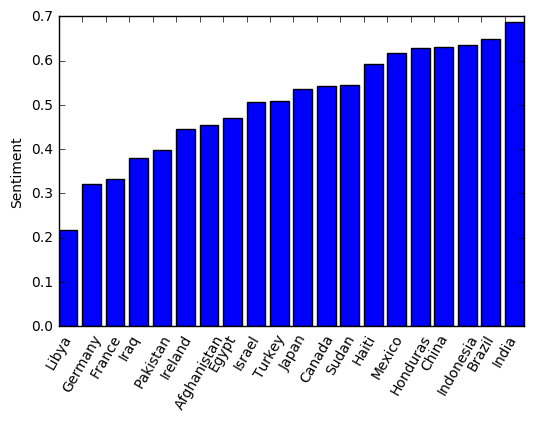

In [6]:
# Keeps only the 20 countries the most frequently cited
index = np.argsort(frequencies)[-20:]
yScores = np.array(scores)[index]
xCountries = np.array(allCountries)[index]

# Sorts countries by score
xCountries = xCountries[list(np.argsort(yScores))]
yScores = np.sort(yScores)

plt.xticks(range(len(yScores)), xCountries,rotation=60)
plt.bar(range(len(yScores)), yScores)
plt.ylabel('Sentiment')
plt.show()